**Trabajo Practico FInal**

**Ciencia de Datos - Ingenieria Industrial UTN BA**

**Curso I5521**

**Machine Learning enfocado a la predicción de Churn**

**Elaborado por: Jaider Saavedra y Agustin Schiliro**

 # Herramientas Machine Learning


In [ ]:
#Importar paquetes de herramientas:
#Datos
import pandas as pd
import numpy as np
#Graficos
import matplotlib.pyplot as plt
import seaborn as sns
#Otros
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importamos librerias de scikit learn para clasificacion

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

#Importamos modelos de SVM.
from sklearn import svm
from sklearn.svm import SVC

#Importamos librerias de Feature Selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold

# Importamos librerias de PCA
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, make_scorer





In [ ]:
# Ingresamos el Dataset desde Google_Drive usando la función de Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargamos el Dataset en la variable 'dataframe'
path_to_csv = r'/content/drive/My Drive/Trabajo_Practico_Final/data_preprocesado.csv'
try:
  df= pd.read_csv(path_to_csv)
except:
  print("Por favor ajuste el path a data_preprocesado.csv")

# Realizamos un output de las primeras 5 'filas de dataframe' para visualizar como se cargó nuestro dataset
df.head()

,SeniorCitizen,Partner,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1.0,1,29.85,29.85,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,34.0,0,64.49,1889.50,0,1,0,0,1,0,0,1,0,0,0,1
2,0,0,2.0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,0,1
3,0,0,45.0,0,42.30,1840.75,0,1,0,0,1,0,0,1,0,0,0,0
4,0,0,2.0,1,72.24,151.65,1,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Normalización del dataframe para sus campos float
#Realizamos StandardScaler unicamente a las variables Float, de esta forma no alteramos el resultado de las booleanas
df_normal=df.copy()

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

df_normal[columns_to_scale]= scaler.fit_transform(df_normal[columns_to_scale])

df_normal.head()

,SeniorCitizen,Partner,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,-1.266559,1,-1.192322,-0.992635,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0.089306,0,-0.014243,-0.172002,0,1,0,0,1,0,0,1,0,0,0,1
2,0,0,-1.225472,1,-0.376101,-0.958082,1,1,0,0,1,0,0,0,0,0,0,1
3,0,0,0.541261,0,-0.768907,-0.193514,0,1,0,0,1,0,0,1,0,0,0,0
4,0,0,-1.225472,1,0.249328,-0.938886,1,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Identificamos nuestra feacture resultado, esta contiene el resultado (etiqueta) de la cada sample "Churn"
# Separamos nuestro dataframe en X (Samples) e Y(Etiquetas)

# Generamos X e Y

x = df_normal.loc[:, df.columns != 'Churn']
y = df_normal['Churn']

#Verificamos que se cargaran bien los datos
print(x.shape)
print(y.shape)


(6988, 17)
(6988,)


#Machine Learning

**Entrenamiento del Modelo Predictivo**

In [ ]:
# Separa mi dataset en Train y Test con la dunción "train_test_split", usamos los parámetros generales (Train 70% y Test 30%)

xtrain, xtest, ytrain, ytest = train_test_split(x.values, y, test_size=0.30, random_state=4)

In [ ]:
# Vemos como se distribuye xtrain
xtrain.shape
xtrain_scal = xtrain.copy()

In [ ]:
#Vemos como se distribuye xtest
xtest.shape
xtest_scal = xtest.copy()

In [ ]:
# Verificamos para cada feature su devío y media
print("media de cada feature a lo largo del dataset")
print(xtrain_scal.mean(axis=0))
print(" ")
print("Desvio STD de cada feature a lo largo del dataset")
print(xtrain_scal.std(axis=0))

media de cada feature a lo largo del dataset
[ 0.13882642  0.41975056 -0.00274196  0.66550808  0.01042916  0.00449137
  0.48579023  0.20936414  0.20936414  0.25557146  0.20936414  0.38989982
  0.17440196  0.19934574  0.17276631  0.45246371  0.18871396]
 
Desvio STD de cada feature a lo largo del dataset
[0.3457653  0.49351801 1.00303504 0.47181254 0.99381505 1.00748192
 0.49979804 0.40685476 0.40685476 0.43618194 0.40685476 0.48772733
 0.37945476 0.39950847 0.37804512 0.49773517 0.39128123]


**Modelo LogisticRegression**

In [ ]:
# Aplicamos Logistic Regression para nuestra predicción
model_lr = LogisticRegression()

In [ ]:
# realizo un cross validation de 5 folds para ver la performance del modelo con distintas particiones de entrenamiento
cv_results = cross_validate(model_lr, xtrain_scal, ytrain, cv=5)

In [ ]:
# Analizamos los resultado obtenidos en cada validación
cv_results

{'fit_time': array([0.02594328, 0.01566291, 0.01519752, 0.0142796 , 0.01467657]),
 'score_time': array([0.00199366, 0.00169063, 0.0016861 , 0.00187111, 0.00186777]),
 'test_score': array([0.79060266, 0.8006135 , 0.79652352, 0.80674847, 0.799591  ])}

In [ ]:
# Vemos el promedio de los accuracy
np.mean(cv_results['test_score'])

0.7988158276777565

In [ ]:
# Ajustamos el modelo a Xtrain e Ytrain
model_lr.fit(xtrain_scal, ytrain)

LogisticRegression()

In [ ]:
# Generamos predicciones para mis xtest
ypred = model_lr.predict(xtest_scal)

In [ ]:
# Mostramos las predicciones
ypred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Comparamos los resultados y calculamos el accuracy
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.7906533142584645


In [ ]:
#Calculamos el AUC
yproba = model_lr.predict_proba(xtest_scal)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.8198916748749444


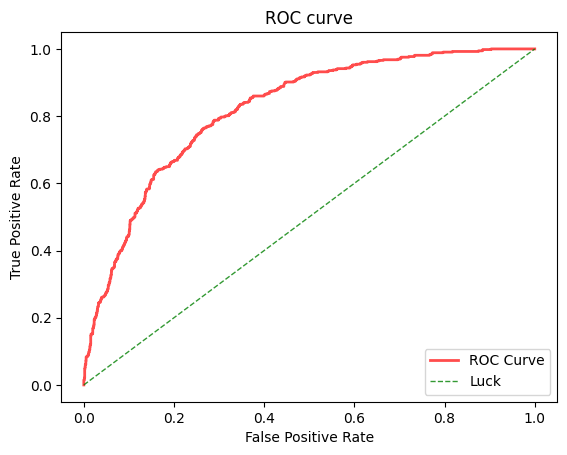

In [ ]:
#Graficamos las Curvas de AUC ROC

plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC Curve', color = 'r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='g',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [ ]:
# Calculamos la matriz de confusión
cm = confusion_matrix(ytest, ypred)
cm

array([[1397,  172],
       [ 267,  261]])

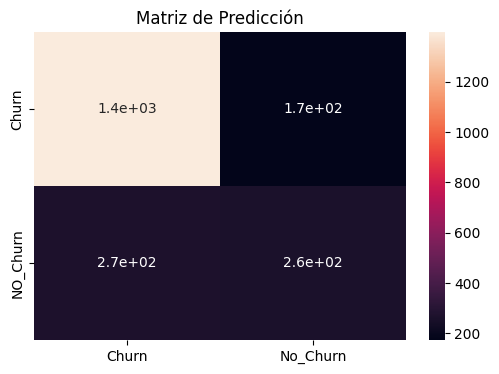

In [ ]:
#Graficamos la matriz
df_cm = pd.DataFrame(cm, index = ['Churn', 'NO_Churn'], columns = ['Churn', 'No_Churn'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Matriz de Predicción')
plt.show()

**Reducción de Dimensionalidad**

En base a 5 Autovalores y Autovectores

In [ ]:
#Realizamos la reducción para xtrain y xtest

# cantidad de componentes a extraer
n_comps = 5

# definimos PCA
pca = PCA(n_components= n_comps)

# fit_transform del PCA a nuestros datos
xtrain_pca = pd.DataFrame(pca.fit_transform(xtrain_scal))

# fit_transform del PCA a nuestros datos
xtest_pca = pd.DataFrame(pca.transform(xtest_scal))

# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_


In [ ]:

pca.explained_variance_

array([2.59065332, 1.14472018, 0.29374584, 0.21636543, 0.21099449])

In [ ]:
# Auto-valores
pca.explained_variance_ratio_


array([0.46117449, 0.20377707, 0.05229109, 0.03851624, 0.03756013])

In [ ]:
# Con la reducción anterior pasamos a 5 dimensiones (Features)
xtrain_pca.shape

(4891, 5)

In [ ]:
# Con la reducción anterior pasamos a 5 dimensiones (Features)
xtest_pca.shape

(2097, 5)

Axes(0.125,0.11;0.62x0.77)


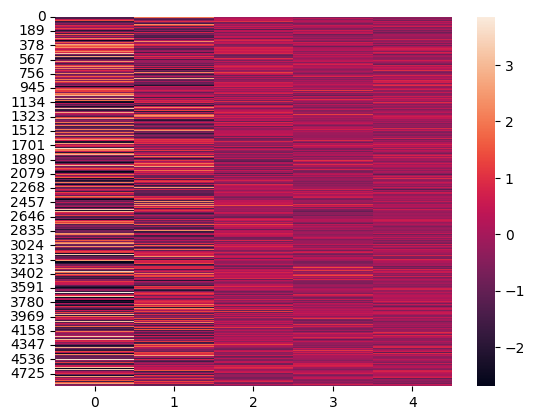

In [ ]:
# Realizamos un mapa de Calor, analizamos que las feactures 0 y 1 son más representativas
print(sns.heatmap(xtrain_pca))


Axes(0.125,0.11;0.62x0.77)


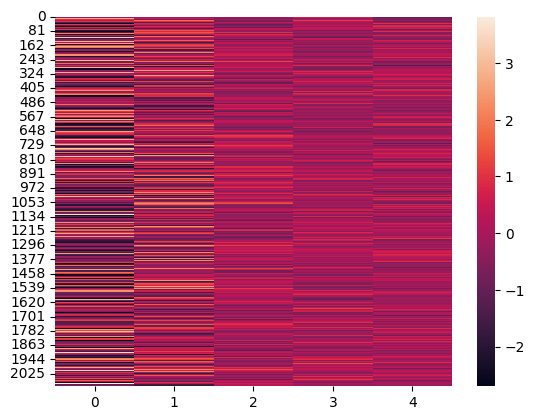

In [ ]:
print(sns.heatmap(xtest_pca))

**Aplicamos Logistic Regression a los datos reducidos**


In [ ]:
# realizo un cross validation de 5 folds para ver la performance del modelo con distintas particiones de entrenamiento
cv_results = cross_validate(model_lr, xtrain_pca, ytrain, cv=5)

In [ ]:
# Vemos el promedio de los accuracy para los datos reducidos
np.mean(cv_results['test_score'])

0.7934978098347505

In [ ]:
# Ajustamos el modelo a Xtrain_pca e Ytrain
model_lr.fit(xtrain_pca, ytrain)

LogisticRegression()

In [ ]:
# Generamos predicciones para mis xtest
ypred_pca = model_lr.predict(xtest_pca)

In [ ]:
# Comparamos los resultados y calculamos el accuracy
test_pca_acc = accuracy_score(ytest, ypred_pca)
print("El accuracy es " + str(test_pca_acc))

El accuracy es 0.7858845970433953


In [ ]:
#Calculamos el AUC_pca
yproba_pca= model_lr.predict_proba(xtest_pca)
fpr1_pca, tpr1_pca, thresholds = roc_curve(ytest.astype('int'), yproba_pca[:,1], drop_intermediate = False)
auc_pca= metrics.auc(fpr1_pca, tpr1_pca)
print("El AUC es = " + str(auc_pca))

El AUC es = 0.8057468808544335


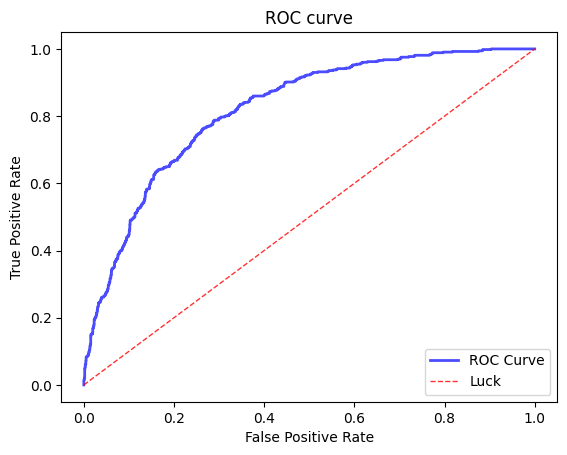

In [ ]:
#Graficamos las Curvas de AUC ROC

plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC Curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

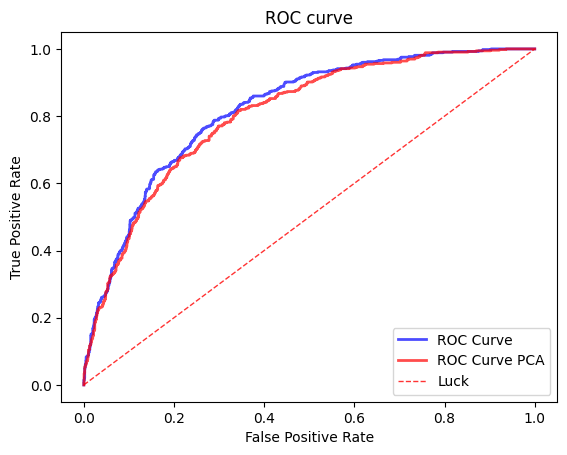

In [ ]:
#Sobreposición de las curvas

plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC Curve', color = 'b')
plt.plot(fpr1_pca, tpr1_pca, lw=2, alpha=0.7 , label = 'ROC Curve PCA', color = 'r')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [ ]:
#Calculo el mse
mse=mean_squared_error(ytest,ypred)
print(mse)

0.20934668574153553


In [ ]:
#Calculo el mse_pca
mse_pca=mean_squared_error(ytest,ypred_pca)
print(mse_pca)

0.21411540295660467
